In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [58]:
df = pd.read_csv('income.csv')

In [59]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [60]:
for column in df.columns:
  print(f'колонка: {column}')

колонка: age
колонка: workclass
колонка: education
колонка: education-num
колонка: marital-status
колонка: occupation
колонка: relationship
колонка: race
колонка: sex
колонка: capital-gain
колонка: capital-loss
колонка: hours-per-week
колонка: native-country
колонка: income >50K


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [62]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64


In [63]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'education'] = np.nan
     

In [64]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

age                  0
workclass         1836
education            5
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64


In [65]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df_drop.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income >50K       0
dtype: int64


In [66]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.age = df_median.age.fillna(df_median.age.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
age                  0
workclass         1836
education            5
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64


In [67]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.age = df_mean.age.fillna(df_median.age.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
age                  0
workclass         1836
education            5
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64


In [68]:
df['old_employers'] = np.where(df['age'] >= 50, 1, 0).astype(int)

In [69]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income >50K',
       'old_employers'],
      dtype='object')

In [70]:
Y = df['old_employers'] # выбираем целевую переменную (категориальную)
X = df.drop('old_employers', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('age', axis=1)

In [71]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,education-num,capital-gain,capital-loss,hours-per-week,income >50K
0,13,2174,0,40,0
1,13,0,0,13,0
2,9,0,0,40,0
3,7,0,0,40,0
4,13,0,0,40,0
...,...,...,...,...,...
32556,12,0,0,38,0
32557,9,0,0,40,1
32558,9,0,0,40,0
32559,9,0,0,20,0


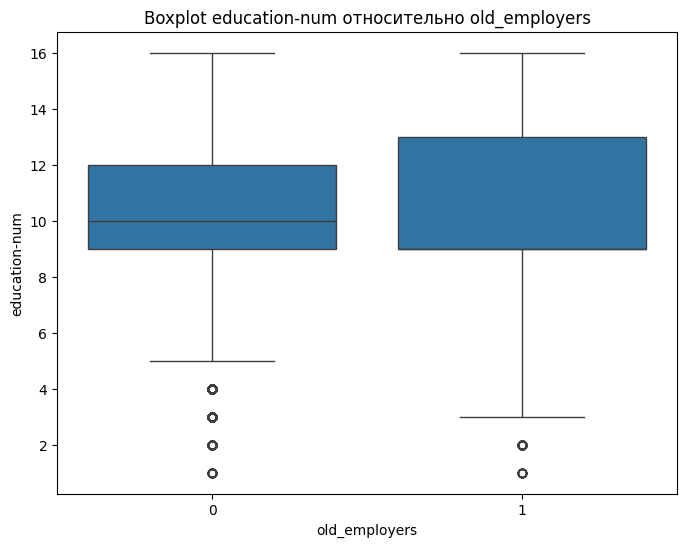

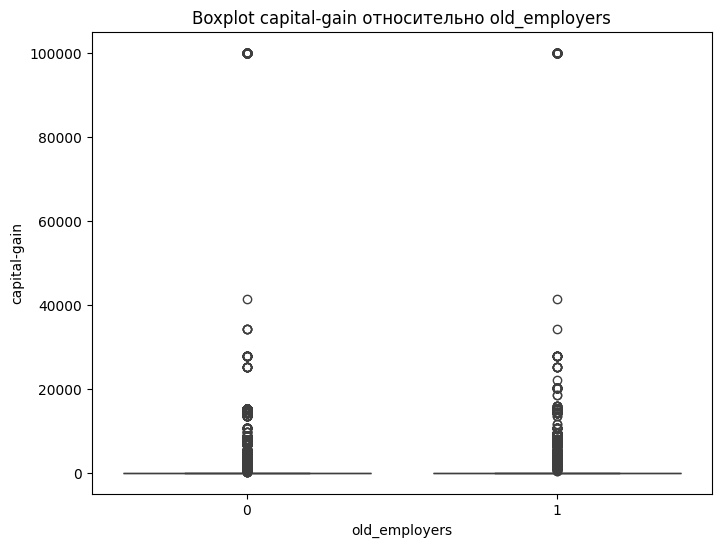

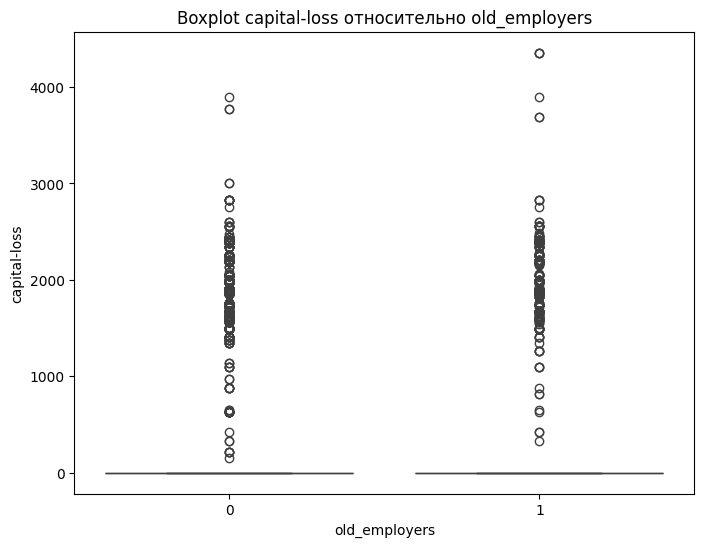

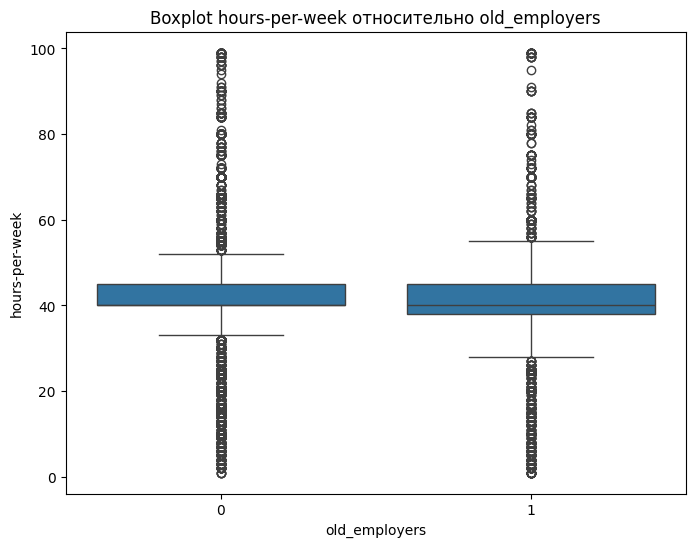

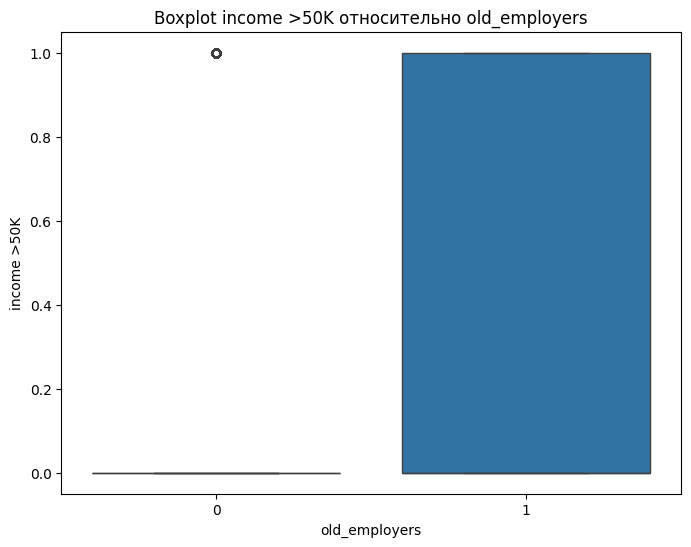

In [72]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='old_employers', y=col, data=df)
    plt.title(f'Boxplot {col} относительно old_employers')
    plt.show()
     

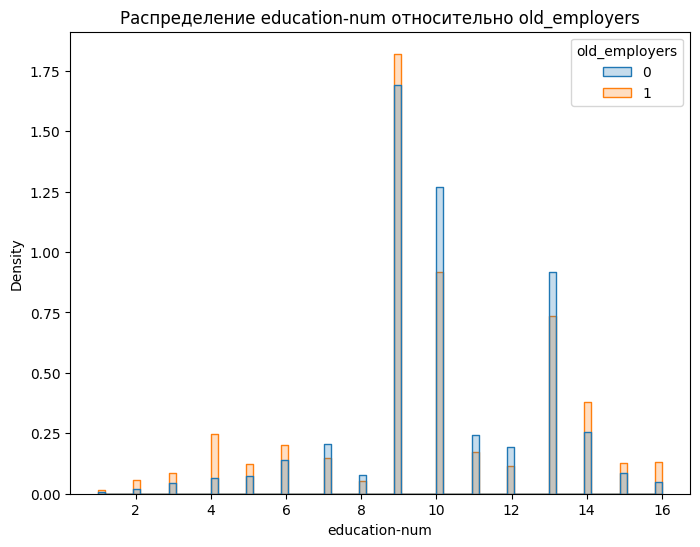

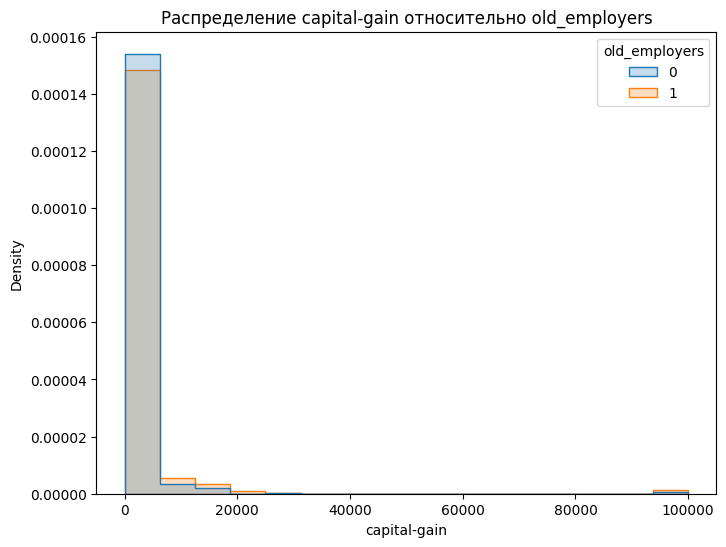

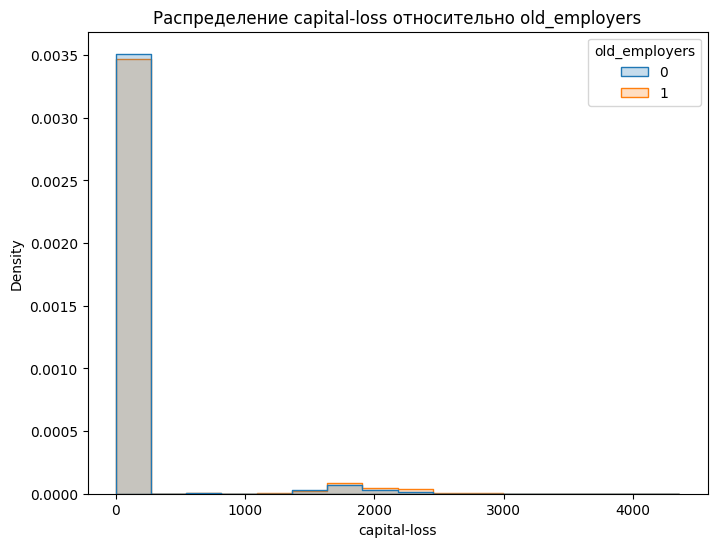

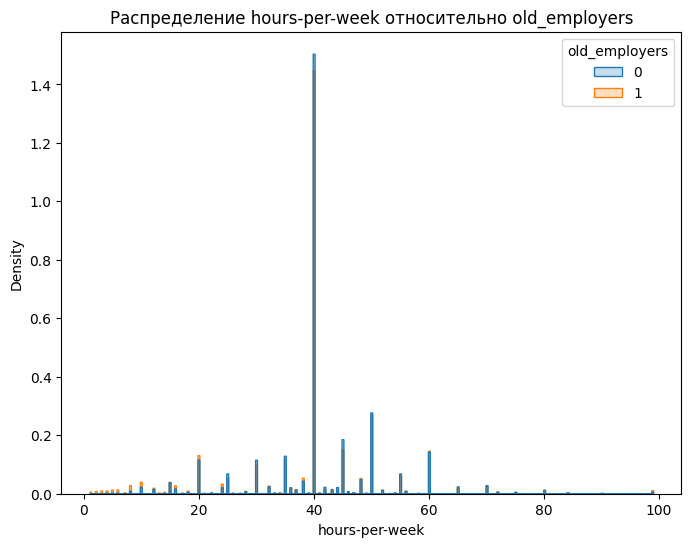

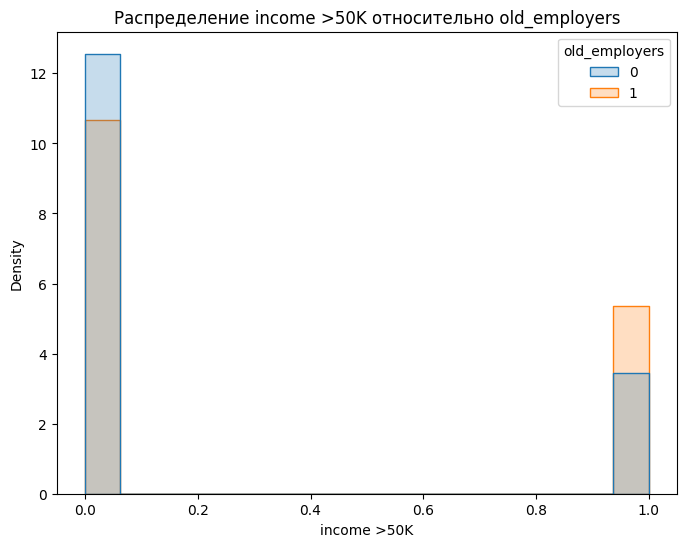

In [73]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='old_employers', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно old_employers')
    plt.show()

⏰ На основе предоставленных графиков можно выделить несколько значимых наблюдений относительно целевого признака Y (например, наличие высокого дохода).

  График "Распределение education-num":
Видно, что уровень образования влияет на распределение целевого признака. Большинство наблюдений сосредоточено в диапазоне значений 8-10 для обеих категорий old_employers. Люди с уровнем образования выше 10 имеют большую вероятность иметь прежнего работодателя.
Чем выше уровень образования, тем больше вероятность высоких доходов, что может быть важно для целевой переменной.
  График "Распределение capital-gain":
Большая часть наблюдений сосредоточена в нулевом значении капитальных приростов (capital gain), однако те, кто имеют значения выше нуля, могут существенно влиять на целевую переменную (доход >50K). Присутствие небольшого числа таких наблюдений важно.
  График "Распределение capital-loss":
Похожая ситуация с потерями капитала: большинство наблюдений сконцентрировано около нуля, но небольшие выбросы могут указывать на различия в целевой переменной.
  График "Распределение hours-per-week":
Большинство людей работают около 40 часов в неделю, но есть и те, кто работает меньше или больше. Это может служить индикатором значимости для предсказания дохода, так как люди, работающие больше 40 часов, могут быть более склонны к доходам выше 50K.
  График "Распределение income >50K":
Наблюдения с доходом выше 50K чаще встречаются среди тех, кто имел прежнего работодателя, что может говорить о влиянии опыта и карьеры на уровень дохода.
  Выводы:
Образование, часовая занятость и капитальные приросты представляют собой важные признаки для предсказания дохода.
Нулевые значения для капитальных приростов и потерь характерны для большинства данных, но их наличие в определённых диапазонах (выбросы) может оказывать значительное влияние на целевой признак.

In [74]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('old_employers')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('old_employers')[df.select_dtypes(include=['object']).columns].describe()
     

⏰ Необходимо сделать подобное описание для своих переменных

In [75]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('old_employers')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для education-num:

                 count       mean       std  min  25%   50%   75%   max
old_employers                                                          
0              25499.0  10.150594  2.428713  1.0  9.0  10.0  12.0  16.0
1               7062.0   9.828236  3.023129  1.0  9.0   9.0  13.0  16.0


Описательная статистика для capital-gain:

                 count         mean          std  min  25%  50%  75%      max
old_employers                                                                
0              25499.0   875.532139  6564.875612  0.0  0.0  0.0  0.0  99999.0
1               7062.0  1807.438403  9756.995362  0.0  0.0  0.0  0.0  99999.0


Описательная статистика для capital-loss:

                 count        mean         std  min  25%  50%  75%     max
old_employers                                                             
0              25499.0   81.056747  384.237518  0.0  0.0  0.0  0.0  3900.0
1               7062.0  109.860379  463.6

In [76]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


workclass                        education                  \
                  count unique      top   freq     count unique      top   
old_employers                                                              
0                 24351      8  Private  18735     25499     16  HS-grad   
1                  6374      7  Private   3961      7062     16  HS-grad   

                    marital-status         ...   race           sex         \
               freq          count unique  ...    top   freq  count unique   
old_employers                              ...                               
0              8090          25499      7  ...  White  21607  25499      2   
1              2411           7062      7  ...  White   6209   7062      2   

                           native-country                               
                top   freq          count unique            top   freq  
old_employers                                                           
0              Male  16776          25028     41  United-States  22761  
1              Male   5014           6950     40  United-States   6409  

[2 rows x 32 columns]

  1. Age:
Средний возраст в группе с old_employers = 0 (младше 50 лет) составляет 33.03 года, с разбросом (стандартное отклонение) 8.95. Минимальный возраст — 17, максимальный — 49.
В группе с old_employers = 1 (старше 50 лет) средний возраст составляет 58.62 года, с меньшим стандартным отклонением 7.48. Возраст варьируется от 50 до 90 лет.
  2. Education-num:
У людей младше 50 лет среднее количество лет образования равно 10.15, в то время как у людей старше 50 лет это значение чуть ниже — 9.83.
Диапазон значений в обеих группах схож: от 1 до 16 лет образования.
  3. Income >50K:
Среди людей младше 50 лет медианное значение переменной income >50K равно 0 (большинство зарабатывают меньше 50K).
Среди людей старше 50 лет медианное значение переменной — 1, что указывает на то, что значительное число людей в этой группе зарабатывают больше 50K.
  4. Workclass (категориальная переменная):
В обеих возрастных группах большинство людей работают в частном секторе: Private.
В группе old_employers = 0 — 18,735 человек работают в частном секторе, в группе old_employers = 1 — 3,961.
  5. Education (категориальная переменная):
В обеих группах наиболее частое образование — HS-grad (средняя школа): у 8,090 человек в группе младше 50 лет и 2,411 человек в группе старше 50 лет.
  6. Marital-status:
В группе младше 50 лет самым частым семейным статусом является Never-married (8090 человек), в группе старше 50 лет — Married-civ-spouse (2411 человек).
  7. Race:
В обеих группах преобладают представители White (белые): 21,607 человек среди младше 50 лет и 6,209 среди старше 50 лет.
8. Sex:
Среди людей младше 50 лет 16,776 человек — мужчины, среди старше 50 лет 5,014 — мужчины.
  9. Native-country:
В обеих группах большинство людей родом из United-States: 22,761 среди младше 50 лет и 6,409 среди старше 50 лет.


2. Расчет теста Пирсона

In [77]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,income >50K,old_employers
age,1.000000,0.036527,0.077674,0.057775,0.068756,0.234037,0.772990
education-num,0.036527,1.000000,0.122630,0.079923,0.148123,0.335154,-0.051639
capital-gain,0.077674,0.122630,1.000000,-0.031615,0.078409,0.223329,0.052004
capital-loss,0.057775,0.079923,-0.031615,1.000000,0.054256,0.150526,0.029459
hours-per-week,0.068756,0.148123,0.078409,0.054256,1.000000,0.229689,-0.042213
income >50K,0.234037,0.335154,0.223329,0.150526,0.229689,1.000000,0.114750
old_employers,0.772990,-0.051639,0.052004,0.029459,-0.042213,0.114750,1.000000


Описание корреляций для значимых признаков:
  Age и Old_employers (0.773):
Очень высокая положительная корреляция между возрастом и переменной old_employers. Это логично, так как переменная old_employers напрямую основана на возрасте — она указывает, старше ли человек 50 лет. Этот признак напрямую связан с целевой переменной и не может использоваться для прогноза других переменных.
  Education-num и Income >50K (0.335):
Есть умеренная положительная корреляция между количеством лет образования и доходом более 50K. Это указывает на то, что более образованные люди чаще зарабатывают больше. Этот признак может быть важным для прогнозирования уровня дохода.
  Capital-gain и Income >50K (0.223):
Наблюдается положительная корреляция между приростом капитала и доходом более 50K. Это означает, что люди с приростом капитала чаще имеют более высокий доход.
  Hours-per-week и Income >50K (0.230):
Умеренная корреляция между количеством рабочих часов в неделю и доходом. Больше рабочих часов коррелирует с более высоким доходом, что вполне ожидаемо.
  Income >50K и Old_employers (0.115):
Есть слабая положительная корреляция между переменной income >50K и возрастом свыше 50 лет. Это указывает на то, что более старшие работники немного чаще зарабатывают больше.

Немного машинного обучения

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [79]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [80]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [81]:
X_processed

,education-num,capital-gain,capital-loss,hours-per-week,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,13,2174,0,40,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,13,0,0,13,0,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,9,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,7,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,13,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,12,0,0,38,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,9,0,0,40,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,9,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,9,0,0,20,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [82]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['int64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income >50K']


In [83]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

     

In [84]:
X_processed

,education-num,capital-gain,capital-loss,hours-per-week,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.800000,0.021740,0.0,0.397959,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.800000,0.000000,0.0,0.122449,0.0,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0.533333,0.000000,0.0,0.397959,0.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.400000,0.000000,0.0,0.397959,0.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.800000,0.000000,0.0,0.397959,0.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.733333,0.000000,0.0,0.377551,0.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,0.533333,0.000000,0.0,0.397959,1.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,0.533333,0.000000,0.0,0.397959,0.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,0.533333,0.000000,0.0,0.193878,0.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
